In [27]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [28]:
df = pd.read_csv('cleaned.csv', encoding='ISO-8859-1')

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,08:26,3.39,17850.0,United Kingdom


In [30]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011,12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011,12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011,12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011,12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011,12:50,4.95,12680.0,France


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   Time         541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [32]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [33]:
df = df.dropna(subset=['Quantity', 'UnitPrice'])

In [34]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

df['TotalAmount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Time,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010,08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010,08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010,08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010,08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010,08:26,3.39,17850.0,United Kingdom,20.34


In [35]:
print("Dimensions of the dataset:", df.shape)
print("Columns in the dataset:", df.columns.tolist())

Dimensions of the dataset: (530104, 10)
Columns in the dataset: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Time', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']


In [15]:
print(df.isnull().sum())

InvoiceNo              0
StockCode              0
Description            0
Quantity               0
InvoiceDate            0
         Time          0
UnitPrice              0
  CustomerID      132220
       Country         0
TotalAmount            0
dtype: int64


In [36]:
top_countries = (
    df.groupby("Country")['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_countries

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: TotalAmount, dtype: float64

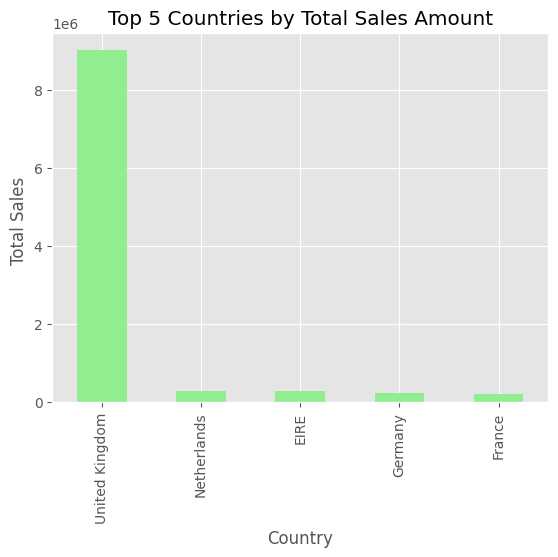

In [43]:
top_countries.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Countries by Total Sales Amount')
plt.xlabel('Country')
plt.ylabel('Total Sales ')
plt.show()

In [94]:
# Fix: Added dayfirst=True
# df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], dayfirst=True)
df["InvoiceDate"] = pd.to_datetime(
    df["InvoiceDate"],
    dayfirst=True,
    format="mixed",
    errors="coerce"
)



df["Month"] = df["InvoiceDate"].dt.to_period("M")


This code is essentially taking a list of specific dates and "grouping" them into their respective months. It’s like moving from a specific timestamp to a broader "bucket."

Here is the breakdown in simple terms:

1. pd.to_datetime(df["InvoiceDate"])
Computers often see dates as just plain text (like "2024-01-01"). This line tells Python: "Treat this column as actual dates, not just text." This allows you to do "date math," like finding the difference between two days.

2. .dt.to_period("M")
This is where the magic happens.

.dt: This stands for "accessor." It tells Python you want to look at the properties of the date (like the year, day, or month).

.to_period("M"): This converts a specific date (like 2024-01-15 10:30:00) into a Period representing the whole month (2024-01).

### Revenue Trends Over Time
#### Monthly Revenue

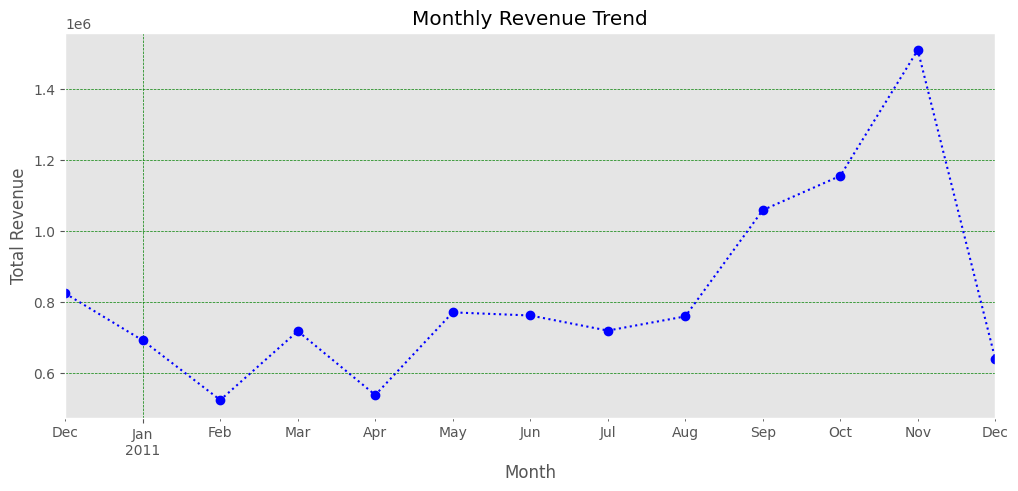

In [57]:
monthly_sales = df.groupby("Month")["TotalAmount"].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(linestyle = 'dotted', color = 'blue', marker = 'o')
plt.title("Monthly Revenue Trend")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


#### Top- Selling Products

C:\Users\91930\AppData\Local\Temp\ipykernel_33912\1271637356.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


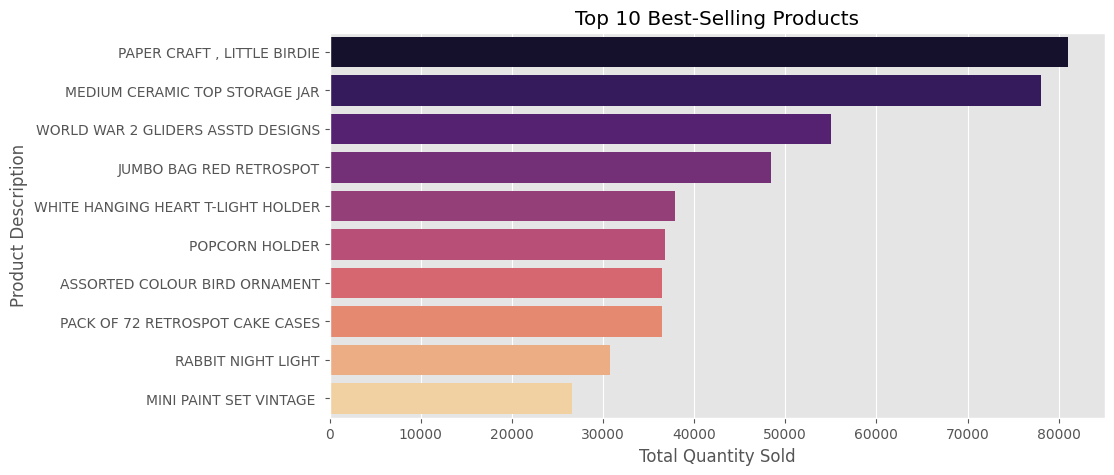

In [89]:
top_products = (
    df.groupby("Description")['Quantity']
    .sum()
    .sort_values(ascending = False)
    .head(10)
)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()

#### High-Value Categories (Revenue-Based)

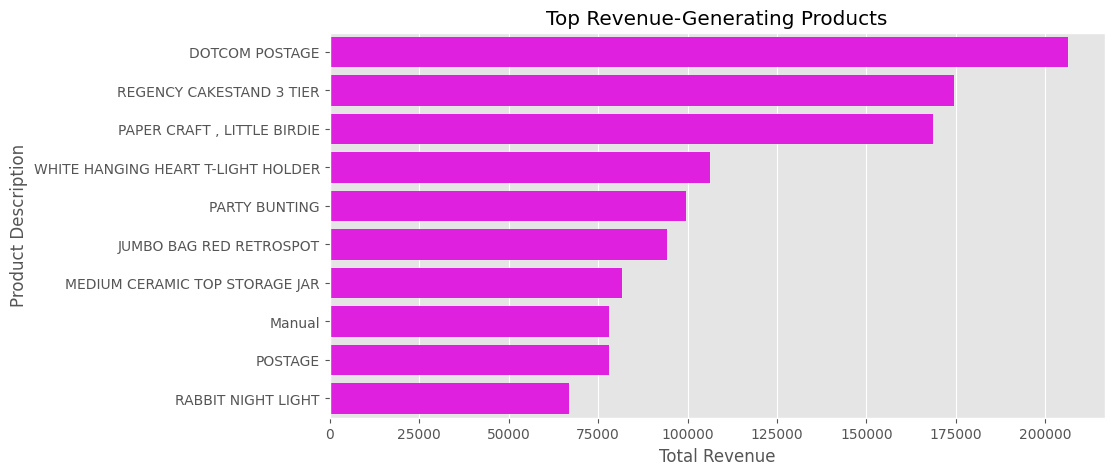

In [83]:
top_products_revenue = (
    df.groupby("Description")["TotalAmount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)


plt.figure(figsize=(10,5))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, color='magenta')
plt.title("Top Revenue-Generating Products")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")
plt.show()


#### Customer Value Analysis

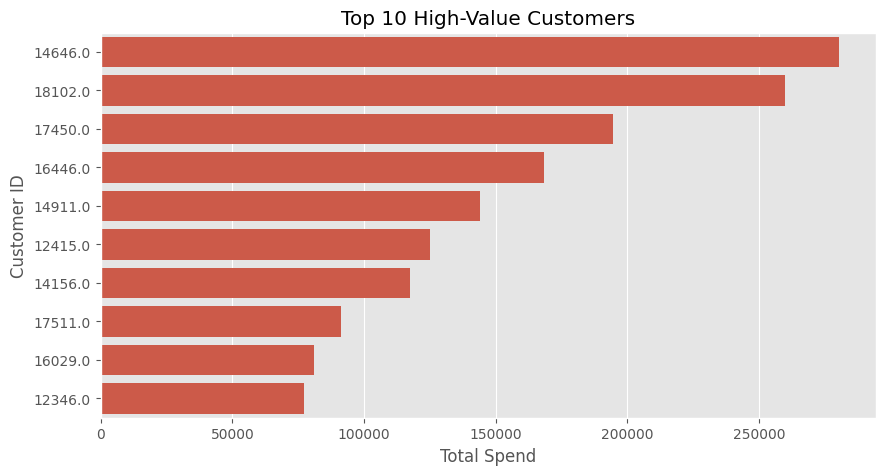

In [84]:
top_customers = (
    df.groupby("CustomerID")["TotalAmount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str))
plt.title("Top 10 High-Value Customers")
plt.xlabel("Total Spend")
plt.ylabel("Customer ID")
plt.show()


#### Order Size Distribution

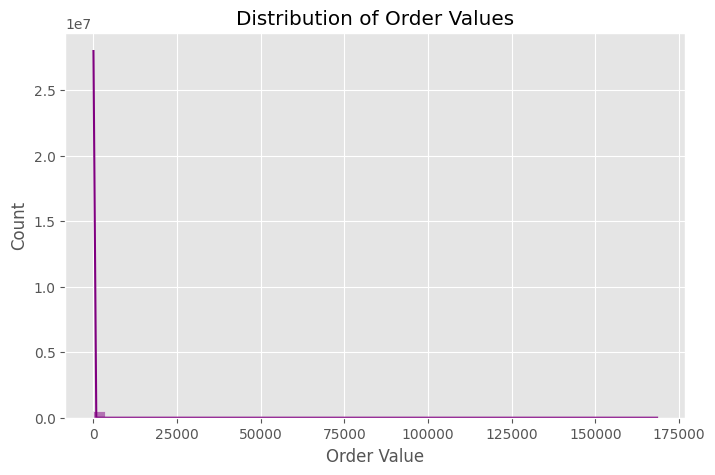

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(df["TotalAmount"], bins=50, color='purple', kde=True)
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.show()


#### Sales Heatmap (Monthly + Country)

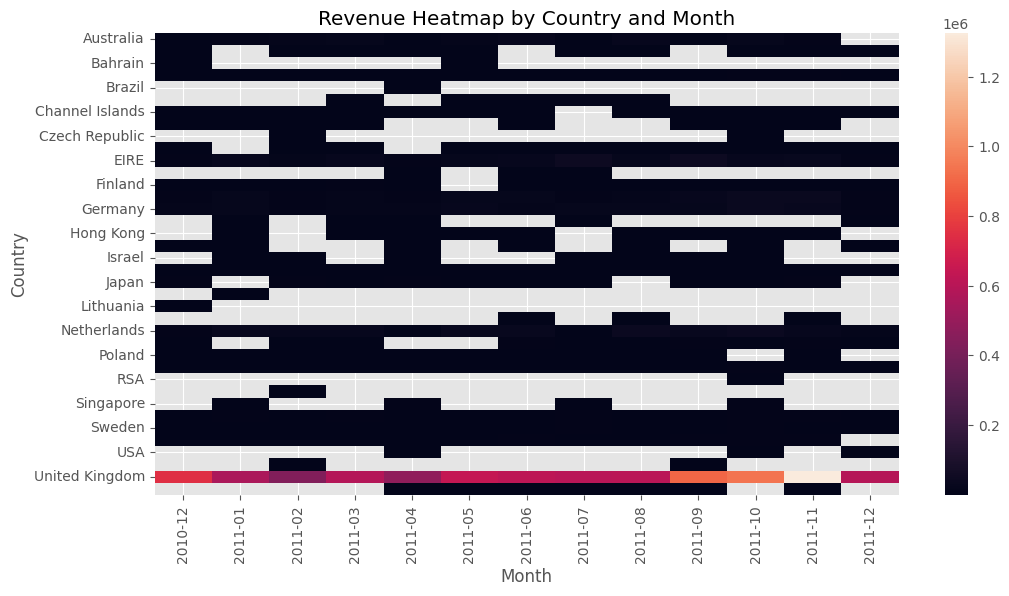

In [86]:
pivot_table = df.pivot_table(
    values="TotalAmount",
    index="Country",
    columns="Month",
    aggfunc="sum"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table,  color='purple')
plt.title("Revenue Heatmap by Country and Month")
plt.show()


####  Business Insights Summary (Print Section)

In [90]:
print("Top Country by Revenue:")
print(top_countries.head(1))

print("\nTop Product by Quantity:")
print(top_products.head(1))

print("\nTop Customer by Spend:")
print(top_customers.head(1))


Top Country by Revenue:
Country
United Kingdom    9025222.084
Name: TotalAmount, dtype: float64

Top Product by Quantity:
Description
PAPER CRAFT , LITTLE BIRDIE    80995
Name: Quantity, dtype: int64

Top Customer by Spend:
CustomerID
14646.0    280206.02
Name: TotalAmount, dtype: float64
